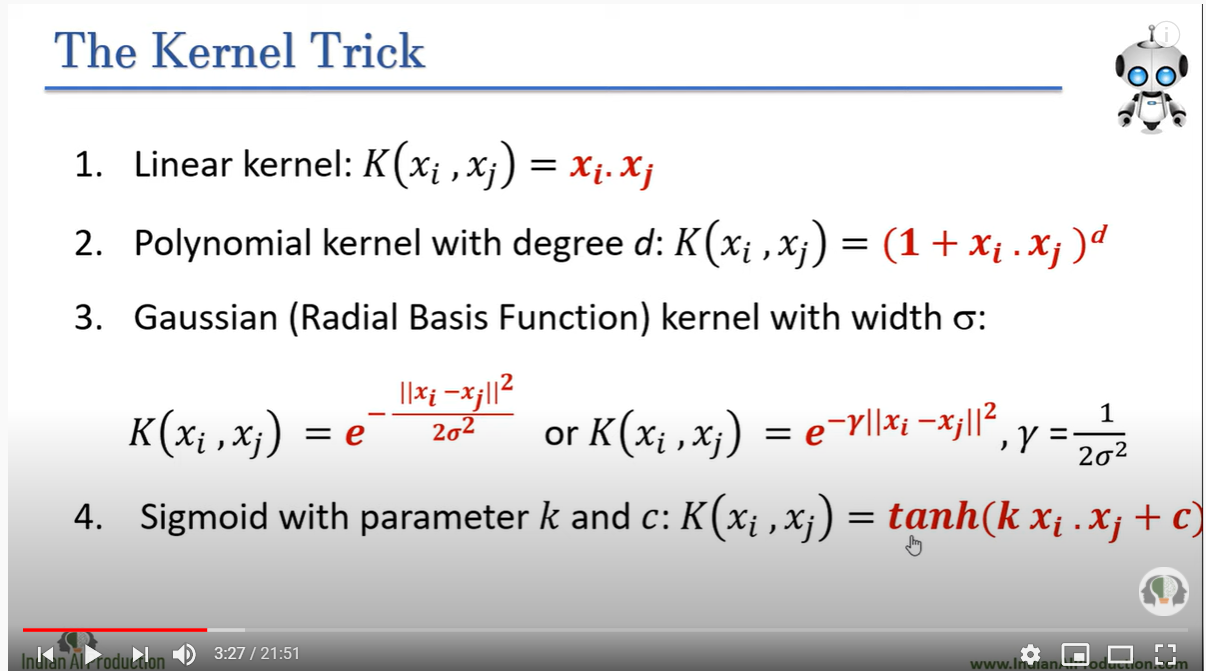

In [1]:
# Kernel Tricks that can be used to solve SVC:
from IPython.display import Image
Image(filename ="kernel.png",width=500)

In [2]:
# Linear Kernel: Hyperplane looks like a line while classifying the problem.
# Polynomial Kernel: Hyperplane looks like a curve while classifying the problem.
# Radial Basis Function (RBF) (Gaussian Kernel): Hyperplane looks like a plane while classifying the problem.It can be used
                                               # when you need to convert a 2D plane into multidimensional plane.

In [3]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [4]:
data=load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
data["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
# you can access the data (which is in dictionary format) in two ways:
    # data["feature_names"]
    # data.feature_names

In [10]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [12]:
type(data["feature_names"])

numpy.ndarray

In [13]:
df=pd.DataFrame(data=data["data"],columns=data["feature_names"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
df["target"]=data["target"]

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
# In target: 0=> Patient is suffering from cancer
#            1=> Patient is not affected by cancer

In [17]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [18]:
df.shape

(569, 31)

In [19]:
# We first split data into features and target variables
X=df.drop(columns="target")
y=df["target"]

In [20]:
X,y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [21]:
# Now we split data into training data and test data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2020)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [25]:
import matplotlib.pyplot as plt

In [26]:
cancer=df[df["target"]==0]
no_cancer=df[df["target"]==1]

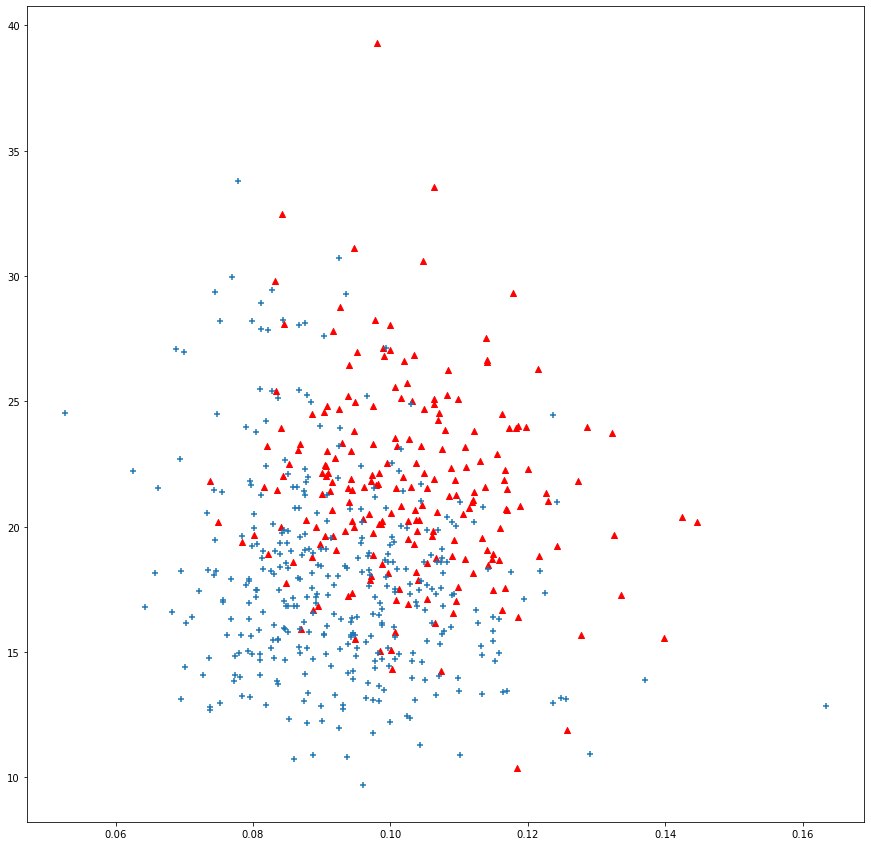

In [27]:
plt.figure(figsize=[15,15])
plt.scatter(cancer["mean smoothness"],cancer["mean texture"],color="r",marker="^")
plt.scatter(no_cancer["mean smoothness"],no_cancer["mean texture"],marker="+")

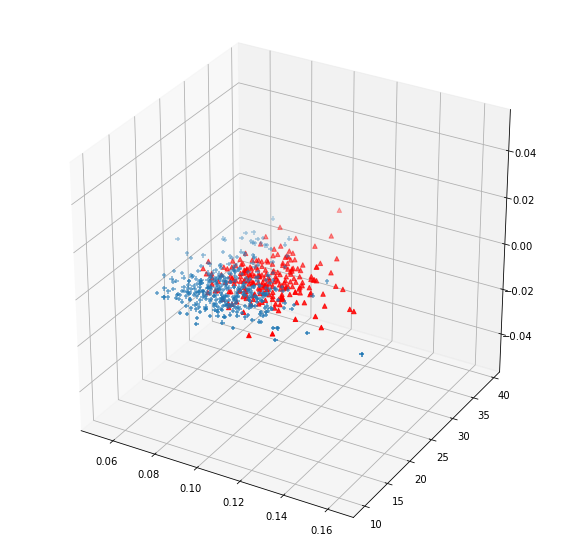

In [28]:
# To draw 3D plots
plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter(cancer["mean smoothness"],cancer["mean texture"],color="r",marker="^")
ax.scatter(no_cancer["mean smoothness"],no_cancer["mean texture"],marker="+")

In [29]:
# You can see that soft margin classification can be done on this dataset.

In [30]:
# Now we train the model

In [31]:
from sklearn.svm import SVC

In [32]:
svc_rbf=SVC(kernel="rbf")

In [33]:
svc_rbf.fit(X_train,y_train)
svc_rbf.score(X_test,y_test)

0.9122807017543859

In [34]:
# You can see that our score is 91.22% and hence our model is well trained. Since, we are dealing with medical problems,
# we generally don't depend on accuracy.

In [35]:
# Since, we have not yet feature scaled our data lets feature scale our data and test its accuracy. Note that feature scaling
# improves accuracy of our model.

In [36]:
from sklearn.preprocessing import StandardScaler

In [40]:
std_scaler=StandardScaler()
std_scaler.fit(X_train)
X_train_sc=std_scaler.transform(X_train)
X_test_sc=std_scaler.transform(X_test)

In [41]:
svc_rbf_sc=SVC(kernel="rbf")
svc_rbf_sc.fit(X_train_sc,y_train)
svc_rbf_sc.score(X_test_sc,y_test)

0.956140350877193

In [42]:
# You can see the difference between the scores of feature scaled and unscaled data.

In [43]:
# Now lets change the kernels and check for their scores

In [46]:
svc_poly_sc=SVC(kernel="poly",degree=2)
svc_poly_sc.fit(X_train_sc,y_train)
svc_poly_sc.score(X_test_sc,y_test)

0.8333333333333334

In [45]:
svc_linear_sc=SVC(kernel="linear")
svc_linear_sc.fit(X_train_sc,y_train)
svc_linear_sc.score(X_test_sc,y_test)

0.9649122807017544

In [47]:
# You can see that Linear Kernel gives you the best score. So we are using Linear Kernel To Predict Cancer

In [48]:
patient1 = [17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]

In [53]:
# We took the data from a patient, now we have to convert the list into 2D numpy array and feature scale it to predict whether
# the patient is affected by breast cancer.

In [56]:
patient1_sc=std_scaler.transform([np.array(patient1)])
patient1_sc

array([[ 1.14157516, -2.04268291,  1.31822055,  1.02590938,  1.62044096,
         3.42348005,  2.74540674,  2.64970572,  2.34762157,  2.34157979,
         2.47642647, -0.56729422,  2.77495792,  2.4478528 , -0.23516697,
         1.35781809,  0.68489284,  0.64085494,  1.1927004 ,  0.93126314,
         1.94777877, -1.35487239,  2.37210178,  2.06352534,  1.31020065,
         2.82342306,  2.23450433,  2.38372721,  2.86683913,  2.10454451]])

In [59]:
# Now we predict using the model
svc_linear_sc.predict(patient1_sc)

array([0])

In [60]:
# Hence the patient suufers from breast cancer.

In [66]:
data["target_names"][svc_linear_sc.predict(patient1_sc)[0]]

'malignant'

In [67]:
# You can use if-else to make the output more understandable:
if svc_linear_sc.predict(patient1_sc)[0]==0:
    print("Patient is suffering from cancer")
else:
    print("Patient is not suffers from cancer")

Patient is suffering from cancer


In [68]:
# You can create functions to call the tasks and make the code more efficient.